# Assignment 3
**Due:**  March 19, 10am.


Make a copy of this notebook to  your Bitbucket mp248 repository in the file **Assignment.3/Assignment3.ipynb**.   

**Do your work in a copy of this i-python notebook.**

Do not add any extra files etc. But do add any external module or library files that you may be importing from. 

This notebooks asks you to create visualisations of serveral things. The assignment will be graded by executing your notebook on one of the servers using the MP248 option from the spawner menu. If you have developed your answer notebook elsewhere make sure you test your notebook on one of the course servers, so that you make sure your plots look exactly like you want them on those servers. Notebooks that do not run on the servers can only be partially graded.


## Problem 1

#### The Lorenz equations

One of the most celebrated sets of differential equations in physics is the [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system):
$$ \frac{dx}{dt} = \sigma(y-x) $$ $$\frac{dy}{dt} = rx -y -xz$$ $$\frac{dz}{dt} = xy - bz$$ where $\sigma$, $r$ and $b$ are constants. (The names of these constants may seem arbirtrary and odd but are always used in these equations -- _for historical reasons_.

Read about these equations, when and why they were introduced? What special behaviour do they show?

1. Implement an explicit solution to the Lorenz equations. Always use the range from $t = 0$ to $t = 50 $ with the intial condition $(x,y,z) = (1,1,1)$, and consider three cases for $\sigma$, $r$ and $b$ as shown in the code cell below.
2. Using the explicit solution implementation from part 1.1 construct one plot of $x, y$ and $z$ as a function of time for each case for a time step size of $h=0.01$ and $h=0.0001$ for each case (6 plots in total). 
3. Create for the high-resolution cases a 3D line plot for each case using `from mpl_toolkits.mplot3d import Axes3D`.


The Lorenz equations were introduced in 1963 by Edward Lorenz to demonstrate a simplified mathematical model for atmospheric convection. The equations demonstrate the properties of a 2D fluid layer warmed from below and cooled from above. The equations express the rate of change of three variables: x is the rate of convection, y is the horizontal temperature variation, and z is the vertical temperature variation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

'''
General function to plot Lorenz Differential Equation Solution
Parameters
    - rho
    - sigma
    - beta
    - state0
    - t_start
    - t_end
    - step_size
'''

def plot_lorenz(rho, sigma, beta, state0, t_start, t_end, h):

    def f(state, t):
      x, y, z = state  # unpack the state vector
      return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

    t = np.arange(t_start, t_end, h)

    states = odeint(f, state0, t)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(states[:,0], states[:,1], states[:,2])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.title("rho="+str(rho)+", sigma="+str(sigma)+", beta="+'{0:.3f}'.format(beta)+", h="+str(h))
    plt.show()

state0 = [1.0, 1.0, 1.0]
t_start = 0.0
t_end = 50.0

In [2]:
# 1 : 'benchmark'
case = 1
if case == 1:
    r = 28.0
    s = 10.0
    b = 8.0 / 3.0
elif case == 2:
    r = 38.0
    s = 7.0
    b = 7.0 / 3.0
elif case == 3:
    r = 28.0
    s = 12.0
    b = 2.0 / 3.0

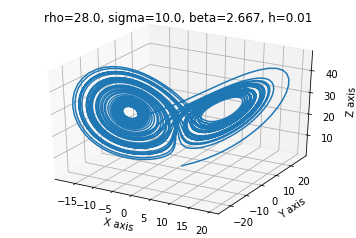

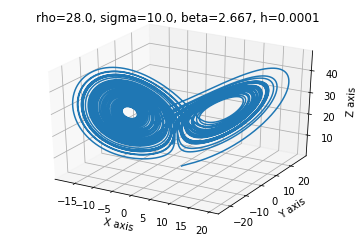

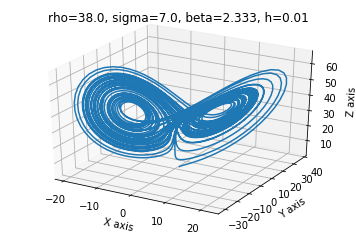

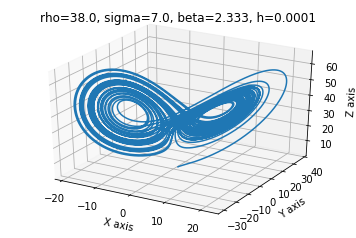

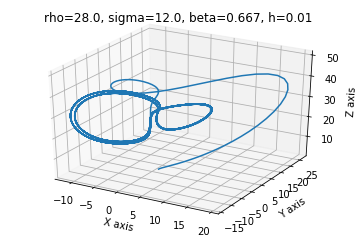

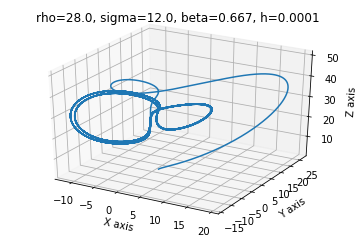

In [3]:
'''
Plot all 6 Lorenz equation solutions
'''

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
h = 0.01
plot_lorenz(rho, sigma, beta, state0, t_start, t_end, h)
h = 0.0001
plot_lorenz(rho, sigma, beta, state0, t_start, t_end, h)

rho = 38.0
sigma = 7.0
beta = 7.0 / 3.0
h = 0.01
plot_lorenz(rho, sigma, beta, state0, t_start, t_end, h)
h = 0.0001
plot_lorenz(rho, sigma, beta, state0, t_start, t_end, h)

rho = 28.0
sigma = 12.0
beta = 2.0 / 3.0
h = 0.01
plot_lorenz(rho, sigma, beta, state0, t_start, t_end, h)
h = 0.0001
plot_lorenz(rho, sigma, beta, state0, t_start, t_end, h)

Suggestion for further study (not graded): Setup the same solution with `scipy.integrate.odeint`. The solution can be found [Wikipedia's Lorenz system page](https://en.wikipedia.org/wiki/Lorenz_system). Students are encouraged to first try to figure out the solution yourelf. 

## Problem 2
1. Construct a helix in 3D with the circular component in x, y and the stretch component in z direction. In each direction the values span the range $[-1,1]$ and the helix has 5 rotations. Make a plot in 3D using `from mpl_toolkits.mplot3d import Axes3D` with the view `ax.view_init(elev=45, azim=30)`.
2. Perform a shear transformation in the x direction that is proporitional to $1.5y$ of the helix and plot with view `ax.view_init(elev=80, azim=10)`.
3. Perform a rotation around the y-axis by $33\deg$.

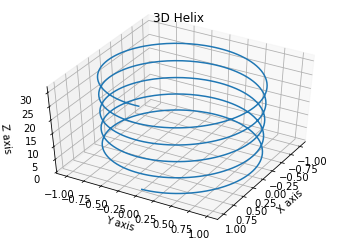

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

'''
Plot default helix
'''

fig = plt.figure()
ax = fig.gca(projection='3d')

rotations = 5
theta_max = rotations * 2 * np.pi
theta = np.linspace(0, theta_max, 1000)
x = np.cos(theta)
y =  np.sin(theta)
z =  theta
ax.plot(x, y, z)
plt.title("3D Helix")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(elev=45, azim=30)
plt.show()

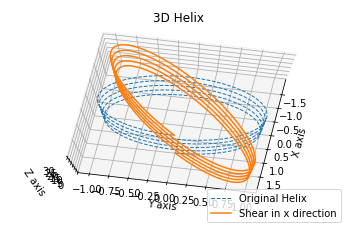

In [5]:
'''
Plot helix with shear
'''

fig = plt.figure()
ax = fig.gca(projection='3d')

rotations = 5
theta_max = rotations * 2 * np.pi
theta = np.linspace(0, theta_max, 1000)
y2 = np.sin(theta)
x2 = np.cos(theta) + 1.5 * y
z2 = theta
ax.plot(x, y, z, linewidth=1, linestyle="dashed", label="Original Helix")
ax.plot(x2, y2, z2, label="Shear in x direction")
plt.title("3D Helix")
plt.legend(loc=4)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(elev=80, azim=10)
plt.show()

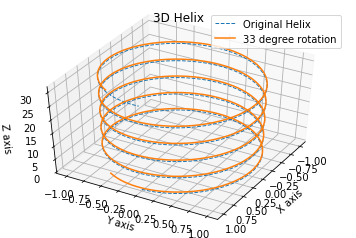

In [6]:
'''
Plot helix with rotation
'''

fig = plt.figure()
ax = fig.gca(projection='3d')

rotations = 5
theta_max = rotations * 2 * np.pi
theta = np.linspace(0, theta_max, 1000)
x3 = np.cos(theta-33*np.pi/180)
y3 =  np.sin(theta-33*np.pi/180)
z3 =  theta
ax.plot(x, y, z, linewidth=1, linestyle="dashed", label="Original Helix")
ax.plot(x3, y3, z3, label="33 degree rotation")
plt.title("3D Helix")
plt.legend(loc=1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(elev=45, azim=30)
plt.show()


## Problem 3: 

Given the equations for the voltage difference at each junction point for the circuit of resistors discussed in class (Part.III, unit 3):
* Simplify and sort the set of equations presented in class for the voltages.
* Setup coefficient matrix $A$ and RHS vector $\vec{u}$.
* Use your own Gaussian elimination routine created in the Lab to solve for $\vec{v}$.
* Use an appropriate numpy library to solve the same set of equations. 

Simplifying equations:

$V_1$ equation:
$$4V_1-V_2-V_3-V_4=0$$

$V_2$ equation:
$$-V_1+3V_2-V_4=0$$

$V_3$ equation:
$$-V_1+3V_3-V_4=5$$

$V_4$ equation:
$$-V_1-V_2-V_3+4V_4=5$$

In [7]:
'''
Setup matrices
'''

A = np.array([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]])

print("A =\n",A)

u = [[0],[0],[5],[5]]

print("u =\n",u)

A =
 [[ 4 -1 -1 -1]
 [-1  3  0 -1]
 [-1  0  3 -1]
 [-1 -1 -1  4]]
u =
 [[0], [0], [5], [5]]


In [8]:
'''
Solving system using own routine
'''
v = np.matmul(np.linalg.inv(A),u)

print("V1 =",v[0][0])
print("V2 =",v[1][0])
print("V3 =",v[2][0])
print("V4 =",v[3][0])

V1 = 2.0
V2 = 1.66666666667
V3 = 3.33333333333
V4 = 3.0


In [9]:
'''
Solving system using numpy built-in routine
'''
v2 = np.linalg.solve(A,u)

print("V1 =",v2[0][0])
print("V2 =",v2[1][0])
print("V3 =",v2[2][0])
print("V4 =",v2[3][0])

V1 = 2.0
V2 = 1.66666666667
V3 = 3.33333333333
V4 = 3.0
